In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy.typing import ArrayLike

def radar_animation(radius: ArrayLike, theta: ArrayLike, dt: float, blinking_frames: int = 2, color: str = 'g') -> FuncAnimation:
    """
    Animates a blinking object on a polar graph to simulate radar detection.
    
    :param radius: Array of radius coordinates for the object.
    :param theta: Array of theta coordinates for the object in radians.
    :param dt: Time difference in seconds between frames.
    :param blinking_time: Time in frames for the object to be visible. Default is 2 frames.
    :param color: Color of the object. Default is green("g").
    """
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar', 'facecolor': 'black'})
    ax.set_facecolor('black')
    fig.patch.set_facecolor('black')
    ax.grid(color = "green")
    ax.tick_params(colors = "green", width = 2, labelsize=5)    
    ax.set_ylim(0, np.max(radius) + 1)
    plot, = ax.plot([], [], color, marker = "o")
    
    def update(frame):
        if frame % blinking_frames == 0:
            plot.set_data(theta[frame % len(theta)], radius[frame % len(radius)])
        else:
            plot.set_data([], [])
        return plot,
    
    frames = np.arange(0, 2 * len(theta))
    return FuncAnimation(fig, update, frames = frames, interval = dt * 1000, blit = True)

/tmp/ipykernel_25309/3553035331.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  plot.set_data(theta[frame % len(theta)], radius[frame % len(radius)])
/tmp/ipykernel_25309/3553035331.py:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  plot.set_data(theta[frame % len(theta)], radius[frame % len(radius)])


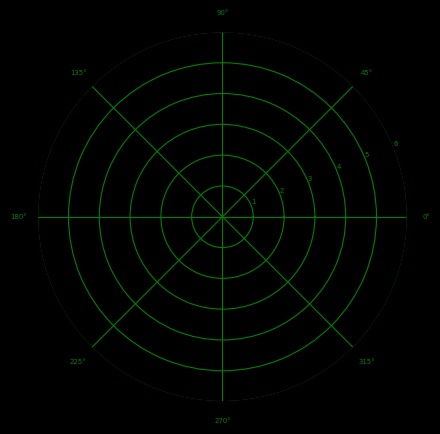

In [75]:
import os

RADII = np.arange(5, 0, -0.25)
ANGLES = np.ones(len(RADII)) * np.pi / 22
DT = 0.5

anim = radar_animation(RADII, ANGLES, DT)
animation_file = os.path.join(os.curdir, 'radar_animation.gif')
anim.save(animation_file, writer='imagemagick', fps=1/DT)